# Projekt MSiABD
## Katarzyna Kowalska

In [3]:
# Read library

library(readr)
library(tidyverse)
library(ggplot2)
library(mctest)
library(caTools)
library(Hmisc)
library(pROC)
library(h2o)
library(tree)

Wczytujemy dane:

In [4]:
# Read data set

mydata <- read.csv("wdbc.csv")

Sprawdzamy strukturę danych:

In [5]:
# Structure check

nrow(mydata)
ncol(mydata)
str(mydata)
head(mydata)

[1] 569

[1] 32

'data.frame':	569 obs. of  32 variables:
 $ ID.number: int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ Diagnosis: chr  "M" "M" "M" "M" ...
 $ V1       : num  18 20.6 19.7 11.4 20.3 ...
 $ V2       : num  10.4 17.8 21.2 20.4 14.3 ...
 $ V3       : num  122.8 132.9 130 77.6 135.1 ...
 $ V4       : num  1001 1326 1203 386 1297 ...
 $ V5       : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ V6       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ V7       : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ V8       : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ V9       : num  0.242 0.181 0.207 0.26 0.181 ...
 $ V10      : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ V11      : num  1.095 0.543 0.746 0.496 0.757 ...
 $ V12      : num  0.905 0.734 0.787 1.156 0.781 ...
 $ V13      : num  8.59 3.4 4.58 3.44 5.44 ...
 $ V14      : num  153.4 74.1 94 27.2 94.4 ...
 $ V15      : num  0.0064 0.00522 0.00615 0.00911 0.01149 ...
 $ V16      : num  0.049 

,ID.number,Diagnosis,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Usuwamy zmienną `ID.number`, ponieważ jest ona zbędna w modelu predykcji:

In [6]:
# Remove the ID.number to avoid any future trouble

mydata$ID.number <- NULL

Sprawdzamy czy w zbiorze nie ma żadnych brakujących danych:

In [7]:
# Missing data check

colSums(is.na(mydata)) # No missing data in the dataset.

Diagnosis        V1        V2        V3        V4        V5        V6        V7 
        0         0         0         0         0         0         0         0 
       V8        V9       V10       V11       V12       V13       V14       V15 
        0         0         0         0         0         0         0         0 
      V16       V17       V18       V19       V20       V21       V22       V23 
        0         0         0         0         0         0         0         0 
      V24       V25       V26       V27       V28       V29       V30 
        0         0         0         0         0         0         0

W zbiorze nie ma braków w danych. 

Ustawiamy zmienną niezależną `Diagnosis` jako `factor`:

In [8]:
# Set independent variable (Diagnosis) as a factor
# M = malignant for 2 and B for B = benign for 1

mydata$Diagnosis <- as.factor(mydata$Diagnosis)

Wizualizujemy dane w postaci hisotgramów:

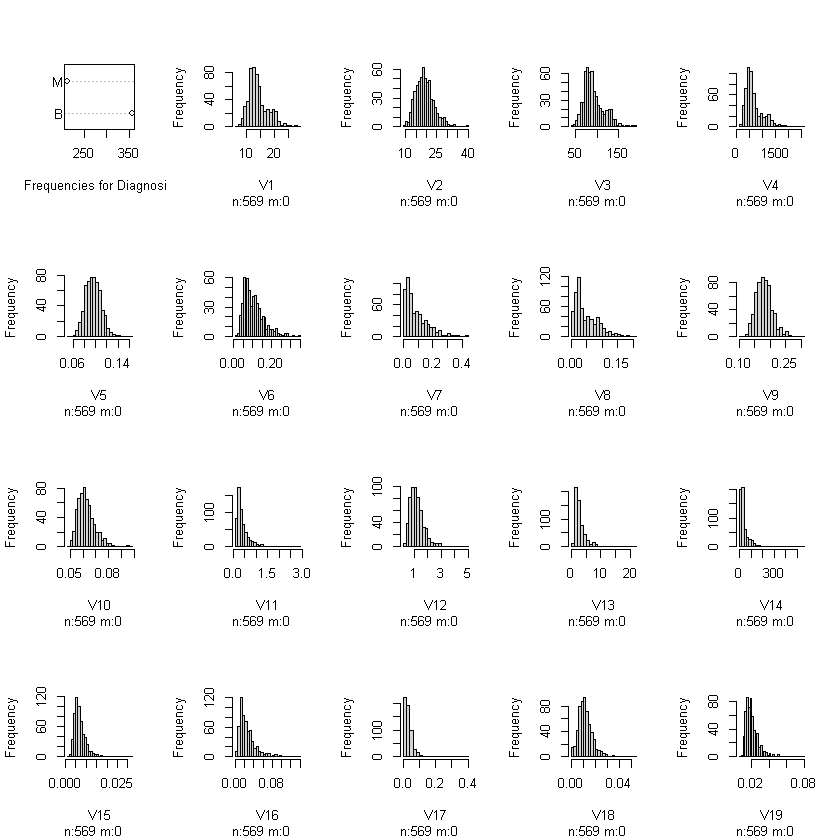

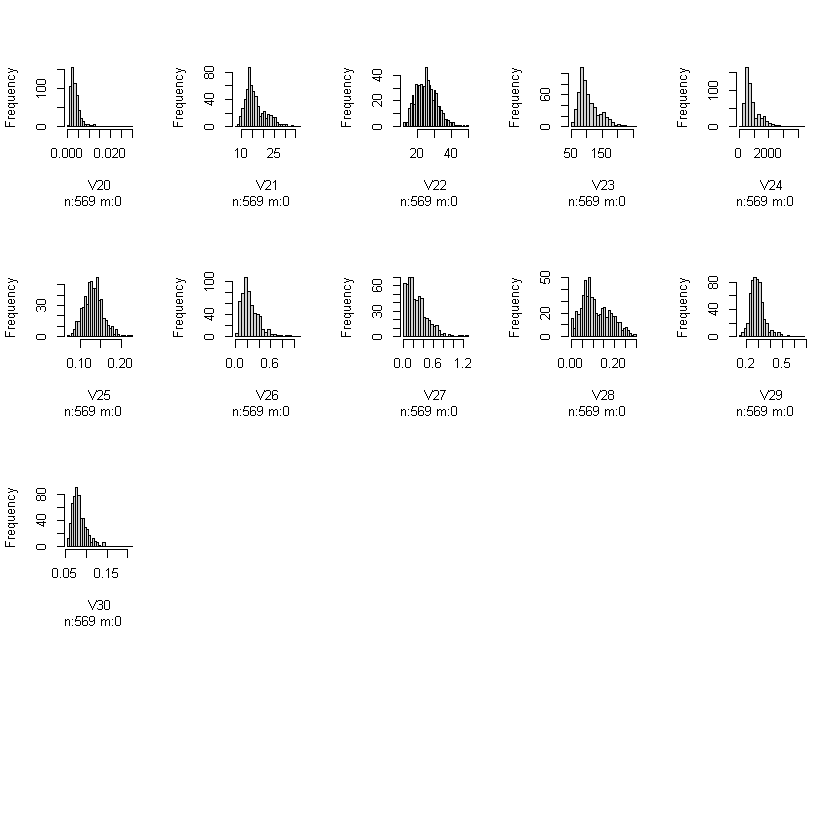

In [9]:
# Data visualization histogram

hist.data.frame(mydata, n.unique=1)

Sprawdzamy, czy w zbiorze danych są obserwacje odstające (ang. outlirs):

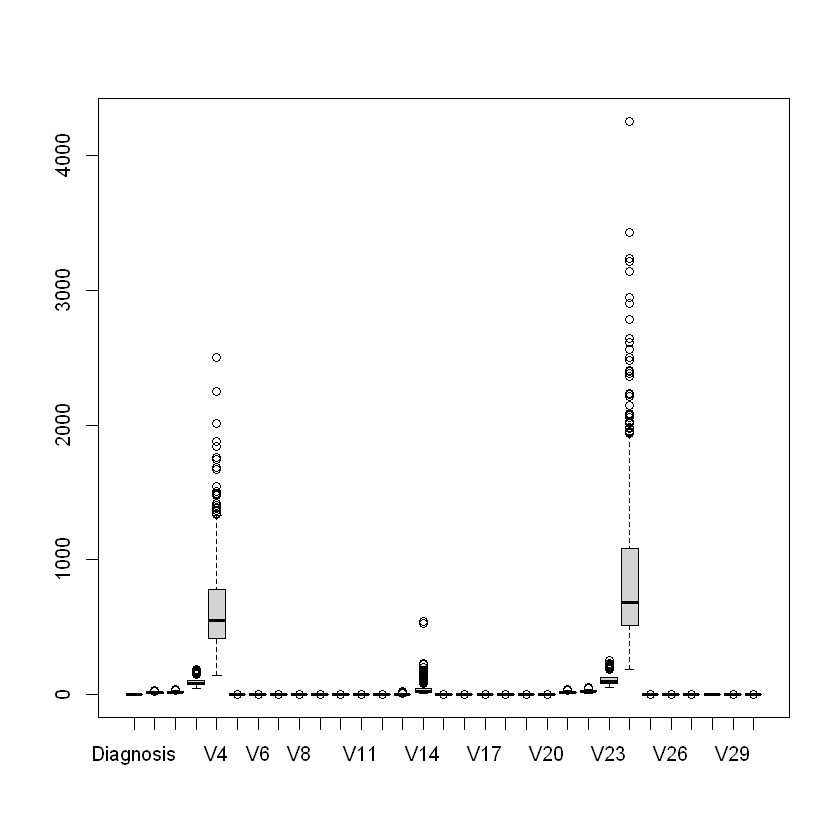

In [10]:
# Outliers check

boxplot(mydata)

Na wykresie pudełkowym możemy zauważyć, że zmienne `V4`, `V14` i `V24` mogą zawierać potencjalne punkty odstające. Badamy to za pomocą wizualizacji danych z tych zmiennych w postaci wykresu pudełkowego:

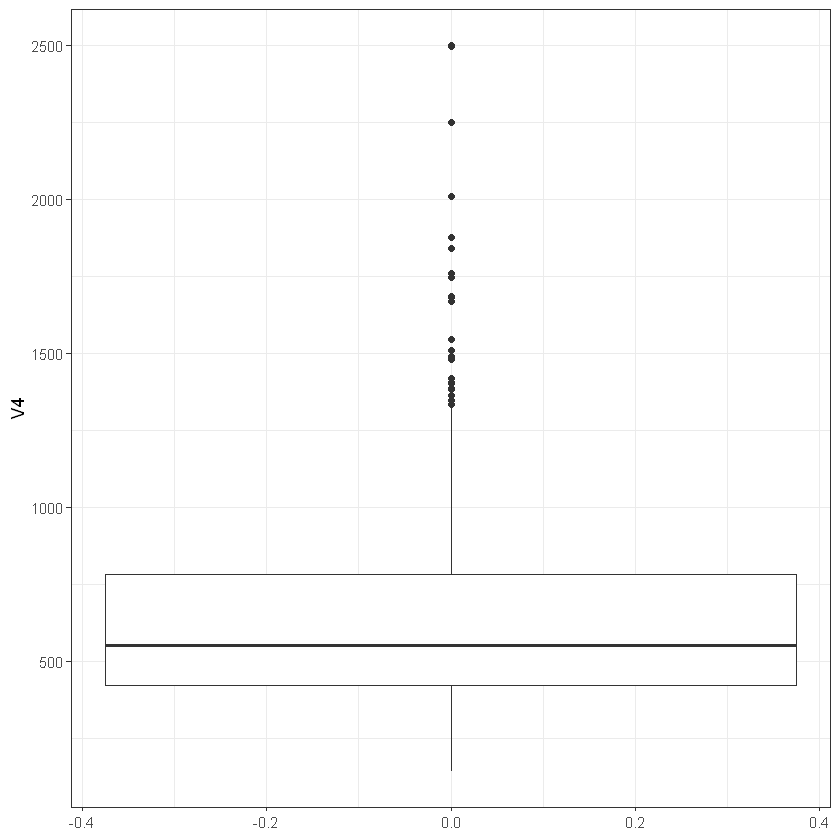

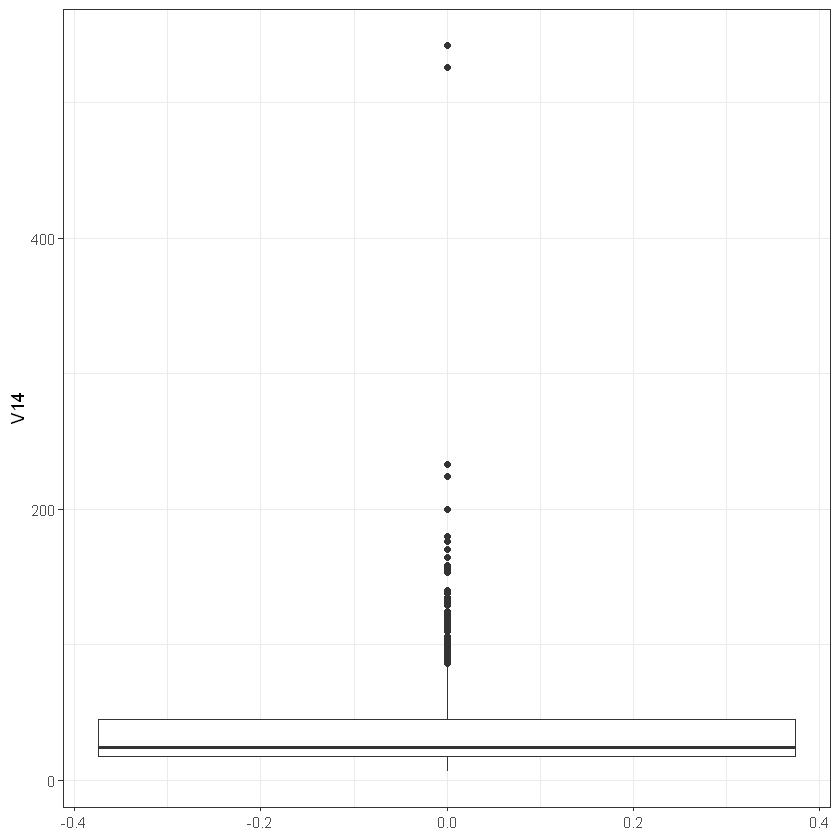

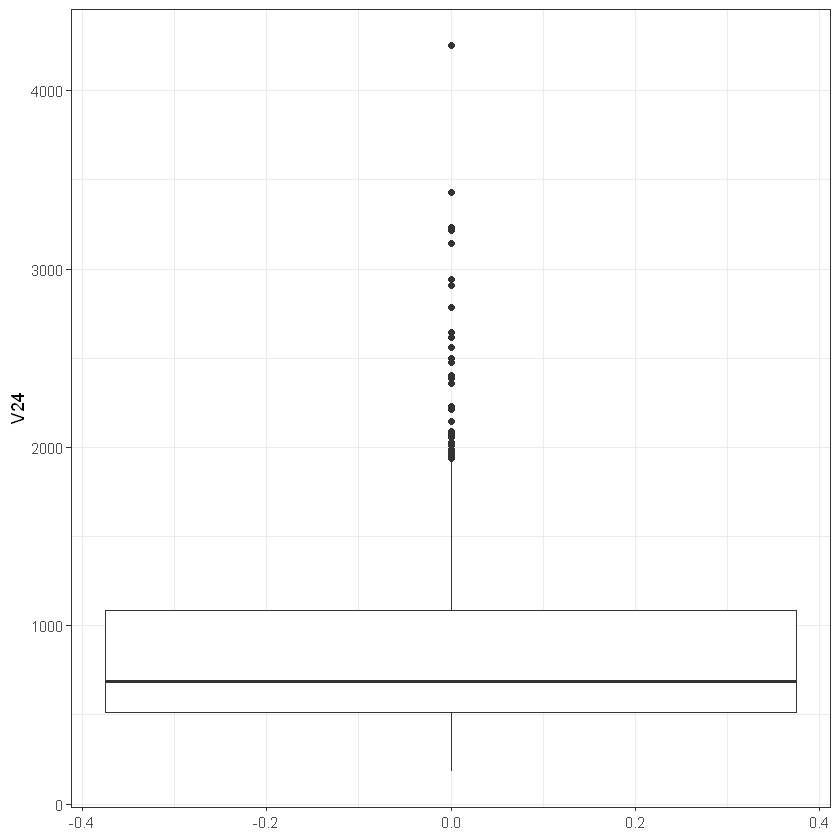

In [11]:
# Outliers in V4 V14 and V24? Checking with a boxplot

ggplot(mydata, aes(y = V4)) + geom_boxplot() + theme_bw()
ggplot(mydata, aes(y = V14)) + geom_boxplot() + theme_bw()
ggplot(mydata, aes(y = V24)) + geom_boxplot() + theme_bw()

Z wykresów widać, że zmienne `V14` i `V24` rzeczywiście mają obserwacje odstające. Usuwamy je:

In [12]:
# variable V14 - 2 outliers & V24 - 1 outlier
# Removing the outliers

mydata$V14 <- ifelse(mydata$V14 > 400, NA, mydata$V14)

mydata$V24 <- ifelse(mydata$V24 > 4000, NA, mydata$V24)

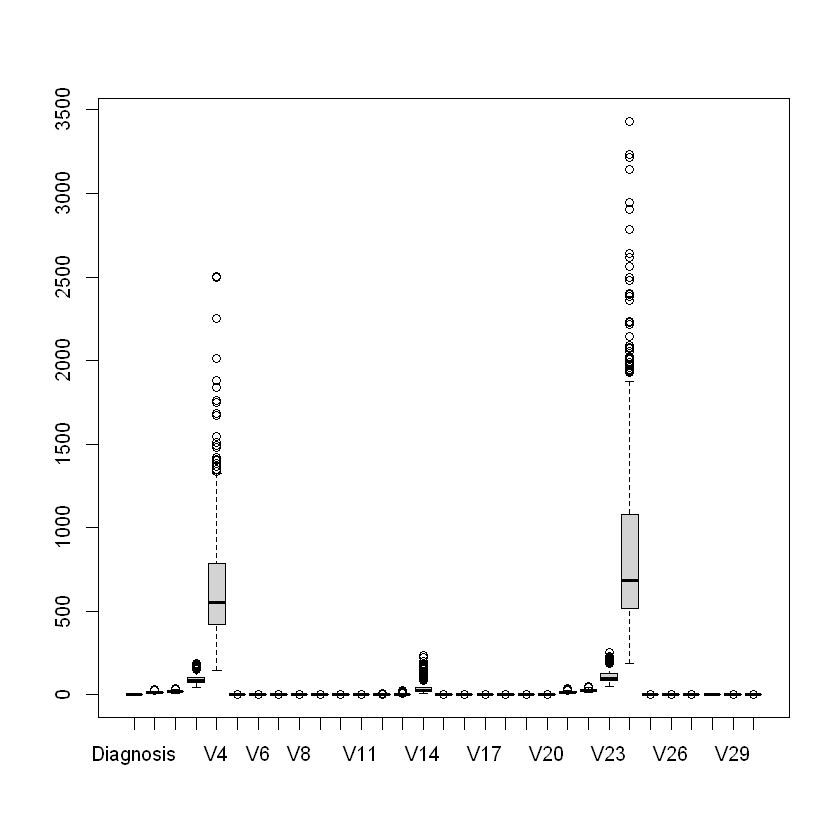

In [13]:
# Data visualization histogram after outliers removal

boxplot(mydata)

In [14]:
xtabs(~Diagnosis, data = mydata)

Diagnosis
  B   M 
357 212 

Dzielimy zbiór danych na podzbiór testowy i uczący:

In [15]:
# Spliting the data for train and test dataset

split <- sample.split(mydata, SplitRatio = 0.8)
split

mydata_train <- subset(mydata, split == TRUE)
mydata_test <- subset(mydata, split == FALSE)

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[13]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
[25]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE

## Model Regresji Logistycznej (Logit) ze wszystkimi zmiennymi

Korzystamy z modelu Regresji Logistycznej, by zobaczyć, które z predyktorów są istotne:

In [16]:
# Logistic Regression Model(Logit) with all variables

set.seed(1234)
mydata_model_logit <- glm(data = mydata_train, formula = Diagnosis ~ ., family = binomial(link = "logit"))
summary(mydata_model_logit)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Diagnosis ~ ., family = binomial(link = "logit"), 
    data = mydata_train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.259e-04  -2.100e-08  -2.100e-08   2.100e-08   1.306e-04  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -1.386e+03  1.771e+06  -0.001    0.999
V1          -2.457e+02  8.569e+05   0.000    1.000
V2          -2.488e+00  7.134e+03   0.000    1.000
V3           3.765e+01  7.307e+04   0.001    1.000
V4           1.258e-01  4.269e+03   0.000    1.000
V5           1.779e+03  8.908e+06   0.000    1.000
V6          -1.887e+03  3.609e+06  -0.001    1.000
V7           1.289e+03  4.728e+06   0.000    1.000
V8          -1.509e+03  1.983e+06  -0.001    0.999
V9           3.972e+02  2.692e+06   0.000    1.000
V10          3.543e+03  1.384e+07   0.000    1.000
V11         -1.357e+02  7.762e+05   0.000    1.000
V12         -8.955e+01  8.141e+04  -0.001    0.999
V13          2.010e+00  1.135e

Żaden z predyktorów nie jest istotny, a model nie daje żadnych wyników. By zbadać, które z predyktorów są istotne moglibyśmy zastosować Regresję Krokową. Nie zrobimy tego, ponieważ mamy za dużo zmiennych. 

In [17]:
# None of the predictors are signficant.
# Stepwise Regression? Too many variables.

## Współliniowość zmiennych

Badamy wpsółliniowość predyktorów.

In [18]:
mydata$Diagnosis <- as.numeric(mydata$Diagnosis)

omcdiag(glm(formula = Diagnosis ~ ., data = mydata))


Call:
omcdiag(mod = glm(formula = Diagnosis ~ ., data = mydata))


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.0000         1
Farrar Chi-Square:     39705.7338         1
Red Indicator:             0.4806         0
Sum of Lambda Inverse: 10057.3209         1
Theil's Method:            5.6112         1
Condition Number:       1808.0709         1

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test


Oszacowana wartość statystyki Chi-kwadrat wynosi ``` 39705.7338``` - jest ona bardzo istotna, co sugeruje obecność współliniowości w modelu. By zlokalizować współliniowość stosujemy test Farrara–Glaubera. Kolumny ```VIF```, ```TOL``` oraz ```Wi``` zapewniają dane diagnostyczne odpowiednio dla współczynnika współliniowości, tolerancji i testu F Farrara-Glaubera.

In [19]:
imcdiag(glm(formula = Diagnosis ~ ., data = mydata))


Call:
imcdiag(mod = glm(formula = Diagnosis ~ ., data = mydata))


All Individual Multicollinearity Diagnostics Result

          VIF    TOL         Wi         Fi Leamer      CVIF Klein   IND1   IND2
V1  3649.5395 0.0003 67560.8874 70104.0813 0.0166 -105.6338     1 0.0000 1.0699
V2    12.0360 0.0831   204.3562   212.0488 0.2882   -0.3484     1 0.0045 0.9812
V3  3623.9742 0.0003 67087.4884 69612.8621 0.0166 -104.8938     1 0.0000 1.0699
V4   381.5016 0.0026  7045.8402  7311.0667 0.0512  -11.0423     1 0.0001 1.0674
V5     8.2527 0.1212   134.3005   139.3560 0.3481   -0.2389     1 0.0065 0.9405
V6    50.2638 0.0199   912.2288   946.5679 0.1410   -1.4549     1 0.0011 1.0489
V7    68.2390 0.0147  1245.0810  1291.9496 0.1211   -1.9751     1 0.0008 1.0545
V8    58.5660 0.0171  1065.9627  1106.0887 0.1307   -1.6952     1 0.0009 1.0519
V9     4.2165 0.2372    59.5600    61.8020 0.4870   -0.1220     0 0.0128 0.8164
V10   15.7173 0.0636   272.5246   282.7832 0.2522   -0.4549     1 0.0034 1.0021

Z testu widzimy, że statystyka F dla zmiennych ```V1```, ```V3``` są bardzo wysokie - rzędu 3 tys, a wartości w kolumnie ```Klein``` równe 1. Oznacza to, że test wykrył współliniowość. Zatem test pokazuje, że zmienna ```V1``` lub ```V3``` będzie jedną z przyczyn współliniowości. Usuwamy je z modelu. W następnych krokach dokonujemy tego samego kryterium eliminacji zmiennych: wartość w kolumnie ```VIF > 10``` a wartości w kolumnie ```Klein``` równe 1. Usuwamy predyktory pojedynczo.

In [20]:
imcdiag(glm(formula = Diagnosis ~ . - V1 - V21 - V3 - V23 - V7 - V24 - V11 - V26 - V28 - V8 - V22 - V14 - V6 - V30, data = mydata))


Call:
imcdiag(mod = glm(formula = Diagnosis ~ . - V1 - V21 - V3 - V23 - 
    V7 - V24 - V11 - V26 - V28 - V8 - V22 - V14 - V6 - V30, data = mydata))


All Individual Multicollinearity Diagnostics Result

       VIF    TOL       Wi       Fi Leamer    CVIF Klein   IND1   IND2
V2  1.6917 0.5911  25.4090  27.2734 0.7688 -0.3142     0 0.0161 0.5405
V4  4.7143 0.2121 136.4373 146.4482 0.4606 -0.8755     1 0.0058 1.0415
V5  5.8568 0.1707 178.4050 191.4952 0.4132 -1.0876     1 0.0046 1.0962
V9  3.4933 0.2863  91.5860  98.3060 0.5350 -0.6487     0 0.0078 0.9435
V10 5.3535 0.1868 159.9174 171.6510 0.4322 -0.9942     1 0.0051 1.0749
V12 2.0731 0.4824  39.4201  42.3125 0.6945 -0.3850     0 0.0131 0.6843
V13 3.5896 0.2786  95.1234 102.1029 0.5278 -0.6666     0 0.0076 0.9536
V15 3.2821 0.3047  83.8303  89.9812 0.5520 -0.6095     0 0.0083 0.9191
V16 6.2585 0.1598 193.1631 207.3361 0.3997 -1.1622     1 0.0043 1.1107
V17 6.1974 0.1614 190.9187 204.9270 0.4017 -1.1509     1 0.0044 1.1086
V18 4.3051 0.2

In [21]:
set.seed(1234)
mydata_model_logit <- glm(data = mydata_train, formula = Diagnosis ~ . - V1 - V21 - V3 - V23 - V7 - V24 - V11 - V26 - V28
                          - V8 - V22 - V14 - V6 - V30,
                          family = binomial(link = "logit"))
summary(mydata_model_logit)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Diagnosis ~ . - V1 - V21 - V3 - V23 - V7 - V24 - 
    V11 - V26 - V28 - V8 - V22 - V14 - V6 - V30, family = binomial(link = "logit"), 
    data = mydata_train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.04450  -0.00019   0.00000   0.00000   2.64904  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept) -8.453e+01  4.014e+01  -2.106   0.0352 *
V2           1.283e+00  5.424e-01   2.366   0.0180 *
V4           4.024e-02  1.742e-02   2.309   0.0209 *
V5           5.052e+01  1.664e+02   0.304   0.7614  
V9           1.147e+02  8.578e+01   1.337   0.1812  
V10         -4.275e+02  2.909e+02  -1.470   0.1417  
V12         -1.659e+00  1.725e+00  -0.962   0.3362  
V13          3.030e+00  1.570e+00   1.930   0.0536 .
V15          1.349e+03  9.546e+02   1.413   0.1577  
V16         -3.580e+01  1.123e+02  -0.319   0.7499  
V17         -5.304e+02  3.201e+02  -1.657   0.0976 .
V18         -3.907e+01  2.875e+02  -0.136   

Po wyeliminowaniu 10 zmiennych możemy zobaczyć na modelu regresji liniowej, że otrzymaliśmy 6 zmiennych istotnych na 10% poziomie istotności - ```V2```, ```V4```, ```V13```, ```V16```, ```V18``` i ```V27```.  Dokonujemy dalszego ulepszania modelu. Możemy w tym celu użyć metody Regresji krokowej:

In [22]:
null_model <- glm(data = mydata_train, formula = Diagnosis ~ 1, family = binomial(link = "logit"))
full_model <- glm(data = mydata_train, formula = Diagnosis ~ V2 + V4 + V5 + V9 + V10 + V12 + V13 + V15 + V16 + V17 + V18 + V19 + V20 + V25 + V27 + V29, family = binomial(link = "logit"))
step_model <- step(full_model, scope = list(lower = null_model, upper = full_model), direction = "both")
summary(step_model)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Start:  AIC=59.91
Diagnosis ~ V2 + V4 + V5 + V9 + V10 + V12 + V13 + V15 + V16 + 
    V17 + V18 + V19 + V20 + V25 + V27 + V29



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

       Df Deviance    AIC
- V19   1   25.930 57.930
- V18   1   25.931 57.931
- V5    1   26.001 58.001
- V16   1   26.017 58.017
- V25   1   26.039 58.039
- V29   1   26.554 58.554
- V12   1   26.898 58.898
- V20   1   26.976 58.976
- V15   1   27.684 59.684
<none>      25.912 59.912
- V10   1   28.118 60.118
- V9    1   28.560 60.560
- V17   1   32.407 64.407
- V13   1   36.195 68.195
- V27   1   44.672 76.672
- V2    1   51.751 83.751
- V4    1   64.203 96.203


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=57.93
Diagnosis ~ V2 + V4 + V5 + V9 + V10 + V12 + V13 + V15 + V16 + 
    V17 + V18 + V20 + V25 + V27 + V29



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

       Df Deviance    AIC
- V18   1   25.950 55.950
- V25   1   26.040 56.040
- V5    1   26.083 56.083
- V16   1   26.087 56.087
- V12   1   26.917 56.917
- V20   1   26.980 56.980
<none>      25.930 57.930
- V10   1   28.269 58.269
- V15   1   28.302 58.302
- V9    1   28.640 58.640
- V29   1   29.372 59.372
+ V19   1   25.912 59.912
- V17   1   32.941 62.941
- V13   1   37.974 67.974
- V27   1   45.167 75.167
- V2    1   51.945 81.945
- V4    1   65.069 95.069


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=55.95
Diagnosis ~ V2 + V4 + V5 + V9 + V10 + V12 + V13 + V15 + V16 + 
    V17 + V20 + V25 + V27 + V29



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

       Df Deviance    AIC
- V25   1   26.048 54.048
- V16   1   26.109 54.109
- V5    1   26.143 54.143
- V20   1   26.980 54.980
- V12   1   27.035 55.035
<none>      25.950 55.950
- V10   1   28.269 56.269
- V15   1   28.939 56.939
- V29   1   29.389 57.389
- V9    1   29.443 57.443
+ V18   1   25.930 57.930
+ V19   1   25.931 57.931
- V17   1   33.090 61.090
- V13   1   43.205 71.205
- V27   1   45.934 73.934
- V2    1   53.756 81.756
- V4    1   68.335 96.335


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=54.05
Diagnosis ~ V2 + V4 + V5 + V9 + V10 + V12 + V13 + V15 + V16 + 
    V17 + V20 + V27 + V29



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

       Df Deviance     AIC
- V16   1   26.158  52.158
- V20   1   27.081  53.081
- V12   1   27.100  53.100
- V5    1   27.389  53.389
<none>      26.048  54.048
- V10   1   29.158  55.158
- V9    1   29.490  55.490
- V29   1   29.886  55.886
+ V25   1   25.950  55.950
+ V18   1   26.040  56.040
+ V19   1   26.048  56.048
- V15   1   31.904  57.904
- V17   1   43.025  69.025
- V13   1   43.700  69.700
- V2    1   54.689  80.689
- V4    1   68.435  94.435
- V27   1   76.877 102.877


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=52.16
Diagnosis ~ V2 + V4 + V5 + V9 + V10 + V12 + V13 + V15 + V17 + 
    V20 + V27 + V29



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

       Df Deviance     AIC
- V12   1   27.597  51.597
- V5    1   27.651  51.651
<none>      26.158  52.158
- V20   1   28.400  52.400
- V10   1   29.238  53.238
- V29   1   29.892  53.892
+ V16   1   26.048  54.048
+ V25   1   26.109  54.109
+ V19   1   26.144  54.144
+ V18   1   26.149  54.149
- V9    1   30.552  54.552
- V15   1   33.613  57.613
- V13   1   44.188  68.188
- V17   1   49.647  73.647
- V2    1   56.789  80.789
- V4    1   68.733  92.733
- V27   1   76.968 100.968


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=51.6
Diagnosis ~ V2 + V4 + V5 + V9 + V10 + V13 + V15 + V17 + V20 + 
    V27 + V29



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

       Df Deviance    AIC
- V5    1   29.222 51.222
<none>      27.597 51.597
- V20   1   29.923 51.923
+ V12   1   26.158 52.158
- V10   1   30.464 52.464
- V9    1   30.706 52.706
+ V16   1   27.100 53.100
+ V18   1   27.429 53.429
+ V19   1   27.529 53.529
+ V25   1   27.592 53.592
- V29   1   31.765 53.765
- V15   1   34.611 56.611
- V13   1   44.382 66.382
- V17   1   50.792 72.792
- V2    1   63.010 85.010
- V4    1   70.439 92.439
- V27   1   77.456 99.456


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=51.22
Diagnosis ~ V2 + V4 + V9 + V10 + V13 + V15 + V17 + V20 + V27 + 
    V29



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

       Df Deviance     AIC
- V10   1   30.711  50.711
<none>      29.222  51.222
+ V5    1   27.597  51.597
+ V12   1   27.651  51.651
- V20   1   31.970  51.970
+ V25   1   28.213  52.213
+ V16   1   28.426  52.426
- V29   1   32.651  52.651
+ V19   1   28.925  52.925
+ V18   1   29.222  53.222
- V9    1   33.578  53.578
- V15   1   44.771  64.771
- V13   1   50.604  70.604
- V2    1   63.326  83.326
- V17   1   65.321  85.321
- V4    1   83.322 103.322
- V27   1   93.723 113.723


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=50.71
Diagnosis ~ V2 + V4 + V9 + V13 + V15 + V17 + V20 + V27 + V29



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

       Df Deviance     AIC
<none>      30.711  50.711
- V29   1   33.073  51.073
+ V10   1   29.222  51.222
+ V12   1   29.440  51.440
+ V25   1   30.117  52.117
+ V16   1   30.161  52.161
+ V5    1   30.464  52.464
+ V19   1   30.594  52.594
+ V18   1   30.650  52.650
- V9    1   34.785  52.785
- V20   1   38.219  56.219
- V15   1   45.310  63.310
- V13   1   50.843  68.843
- V2    1   64.339  82.339
- V17   1   71.574  89.574
- V4    1   92.443 110.443
- V27   1  106.229 124.229



Call:
glm(formula = Diagnosis ~ V2 + V4 + V9 + V13 + V15 + V17 + V20 + 
    V27 + V29, family = binomial(link = "logit"), data = mydata_train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.68127  -0.00083   0.00000   0.00000   2.88833  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -8.153e+01  2.512e+01  -3.245  0.00117 **
V2           9.471e-01  3.178e-01   2.980  0.00288 **
V4           3.642e-02  1.159e-02   3.143  0.00167 **
V9           8.332e+01  4.788e+01   1.740  0.08184 . 
V13          2.396e+00  9.214e-01   2.601  0.00931 **
V15          1.325e+03  4.924e+02   2.691  0.00711 **
V17         -4.491e+02  1.576e+02  -2.849  0.00438 **
V20         -1.444e+03  6.573e+02  -2.197  0.02804 * 
V27          7.389e+01  2.335e+01   3.165  0.00155 **
V29          2.055e+01  1.441e+01   1.426  0.15385   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1

W wyniku regresji krokowej widzimy, że tylko zmienna niezależna ```V17``` jest nieistotna na poziomie istotności 10%. Usuwamy ją z modelu i sprawdzamy regresję logistyczną dla pozostałych predyktorów.

Na poziomie istotności 1% tylko zmienna ```V18``` jest nieistotna, więc ją usuwamy.

## Model Regresji Logistycznej (Logit) bez zmiennych skorelowanych

In [23]:
set.seed(1234)
mydata_model_logit <- glm(data = mydata_train, formula = Diagnosis ~ V2 + V4 + V13 + V16 + V25 + V27 + V29,
                          family = binomial(link = "logit"))
summary(mydata_model_logit)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Diagnosis ~ V2 + V4 + V13 + V16 + V25 + V27 + V29, 
    family = binomial(link = "logit"), data = mydata_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4900  -0.0075  -0.0003   0.0000   3.3108  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.636e+01  1.467e+01  -4.523 6.09e-06 ***
V2           7.046e-01  1.816e-01   3.880 0.000104 ***
V4           2.965e-02  7.496e-03   3.955 7.64e-05 ***
V13          2.100e+00  8.035e-01   2.614 0.008948 ** 
V16         -1.819e+02  5.438e+01  -3.344 0.000825 ***
V25          1.201e+02  3.350e+01   3.586 0.000336 ***
V27          2.042e+01  5.931e+00   3.443 0.000576 ***
V29          3.439e+01  1.046e+01   3.286 0.001015 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 584.983  on 442  degrees of freedom
Residual deviance:  37.056  on 435  degrees of freedom
AIC: 53

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



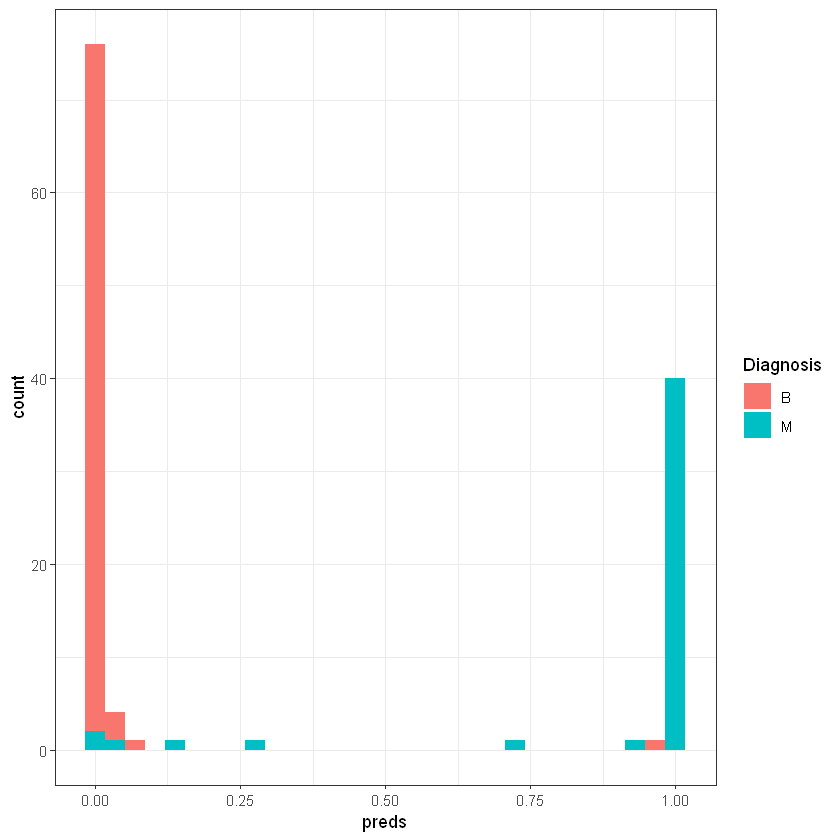

In [24]:
mydata_predictions <- predict(mydata_model_logit, mydata_test, type = "response") %>% 
    bind_cols(mydata_test %>% select(Diagnosis), preds = .)
ggplot(mydata_predictions, aes(x = preds, fill = Diagnosis)) + geom_histogram() + theme_bw()

Dobieramy ```cutoff = 0.7``` dla prawdopodobieństwa.

In [25]:
cut07 <- mydata_predictions %>%
    mutate(predicted = ifelse(preds >= 0.7, yes = "M", no = "B")) %>%
    select(-preds) %>%
    select(predicted, Diagnosis) %>%
    table()
cut07

         Diagnosis
predicted  B  M
        B 78  5
        M  1 42

Sprawdzamy współczynniki modelu, statystykę F1 i krzywą ROC.

Setting levels: control = B, case = M

Setting direction: controls < cases



Dxy 
0.9676811

[1] "Accuracy:  0.952380952380952"
[1] "Precision:  0.939759036144578"
[1] "Sensivity:  0.987341772151899"
[1] "F1 Score:  0.962962962962963"
[1] "Specificity:  0.893617021276596"
[1] "AUC:  0.983840560193913"
[1] "Gini:  0.967681120387827"


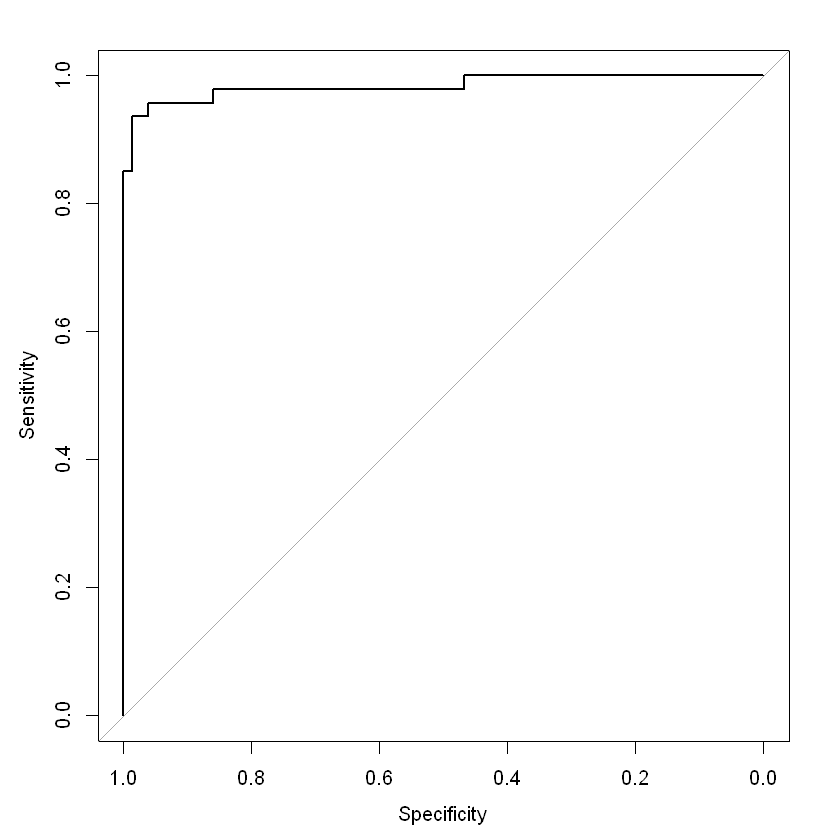

In [26]:
# TP - True Positives
# TN - True Negatives
# FP - False Positives (Type I error)
# FN - False Negatives (Type II error)

# Accuracy = (TP + TN) / ALL
acc <- sum(diag(cut07)) / sum(cut07)

# I klasa
# Precision = TP / (TP + FP)
pre <- cut07[1, 1] / sum(cut07[1, ])
# Recall (Sensivity) = TP / (TP + FN)
rec <- cut07[1, 1] / sum(cut07[, 1])
# Miara F1 = 2*Precision*Recall / (Precision + Recall)
f1 <- 2 * pre * rec / (pre + rec)

# II klasa
# Specificity = TN / (TN + FP)
spec <- cut07[2, 2] / sum(cut07[, 2])
# Krzywa ROC (receiver operating characteristic curve)
mydata_roc <- roc(mydata_predictions$Diagnosis, mydata_predictions$preds)
plot(mydata_roc)
# AUC
auc <- auc(mydata_roc)
# Gini
gini <- 2 * mydata_roc$auc - 1 # GINI = 2AUC-1
# Gini w pakiecie Hmisc
Hmisc::rcorr.cens(mydata_predictions$preds, mydata_predictions$Diagnosis)['Dxy']

print(paste("Accuracy: ", acc))
print(paste("Precision: ", pre))
print(paste("Sensivity: ", rec))
print(paste("F1 Score: ", f1))
print(paste("Specificity: ", spec))
print(paste("AUC: ", auc))
print(paste("Gini: ", gini))

## Model Regresji Logistycznej (Logit) z regularyzacją

W klasycznym modelu regresji logistycznej mamy bardzo mały błąd I-szego i II-giego rodzaju. Czułość tego modelu jest równa 98%, swoistość jest rzędu 89%. Metryka F1  jest na poziomie 96%.

Metryka F1 jest miarą dokładności testu. Oznacza to, że nasz model regresji logistycznej jest dobry.

By poprawić przewidywania zastosujemy model regresji logistycznej z regularyzacją LASSO.

In [27]:
# H2O connection
localH2O <- h2o.init(ip = "localhost",
                     port = 54321,
                     nthreads = -1,
                     min_mem_size = "4g")

# Data transfer to H2O
mydata_train_h2o <- as.h2o(mydata_train, destination_frame = "mydata_train")
mydata_test_h2o <- as.h2o(mydata_test, destination_frame = "mydata_test")

h2o.ls()


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\Kate\AppData\Local\Temp\RtmpWKbwT9\file27ec50054ed3/h2o_Kate_started_from_r.out
    C:\Users\Kate\AppData\Local\Temp\RtmpWKbwT9\file27ec2a727139/h2o_Kate_started_from_r.err


Starting H2O JVM and connecting:  Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 288 milliseconds 
    H2O cluster timezone:       Europe/Belgrade 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.0.1 
    H2O cluster version age:    3 months and 13 days !!! 
    H2O cluster name:           H2O_started_from_R_Kate_pzv484 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.83 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
   

Warning message in h2o.clusterInfo():
"
Your H2O cluster version is too old (3 months and 13 days)!
Please download and install the latest version from http://h2o.ai/download/"


Warning message in use.package("data.table"):
"data.table cannot be used without R package bit64 version 0.9.7 or higher.  Please upgrade to take advangage of data.table speedups."


  |======================================================================| 100%


Warning message in use.package("data.table"):
"data.table cannot be used without R package bit64 version 0.9.7 or higher.  Please upgrade to take advangage of data.table speedups."


  |======================================================================| 100%


key
<fct>
mydata_test
mydata_train


In [28]:
# LASSO
mydata_lasso_balanced <- h2o.glm(x = 1:31, # Nazwy lub indeksy
                               y = "Diagnosis", # Nazwa lub indeks
                               training_frame = "mydata_train",
                               family = "binomial",
                               alpha = 1,
                               lambda_search = TRUE,
                               model_id = "card_lasso_balanced",
                               nfolds = 5,
                               balance_classes = TRUE, # Over/under sampling
                               class_sampling_factors = c(0.5, 0.5),
                               seed = 1234,
                               score_each_iteration = TRUE)

Warning message in .verify_dataxy(training_frame, x, y):
"removing response variable from the explanatory variables"


  |======================================================================| 100%


In [29]:
# Coefficients of the models

h2o.coef(mydata_lasso_balanced)

Intercept            V1            V2            V3            V4 
 -28.05531102    0.00000000    0.09123105    0.00000000    0.00000000 
           V5            V6            V7            V8            V9 
   0.00000000    0.00000000    0.00000000   13.31028108    0.00000000 
          V10           V11           V12           V13           V14 
 -10.61190113    3.30072542    0.00000000    0.00000000    0.02630545 
          V15           V16           V17           V18           V19 
   0.00000000    0.00000000    0.00000000    0.00000000    0.00000000 
          V20           V21           V22           V23           V24 
-130.59243373    0.59487303    0.15281227    0.01510043    0.00000000 
          V25           V26           V27           V28           V29 
  24.24096416    0.00000000    2.49918134   18.35409124    9.31811985 
          V30 
   0.00000000

Regularyzacja LASSO, poza penalizacją modelu, działa także jako selektor zmiennych - zeruje współczynniki nieistotne dla modelu. Ze zmiennych niezerowych, czyli istotnych dla modelu, mamy ```V2```, ```V7```, ```V10```, ```V14```, ```V20```, ```V21```, ```V22```, ```V25```, ```V27```, ```V28``` i ```V29```. Mamy łącznie 11 zmiennych istotnych dla modelu (w modelu klasycznym zostało zakwalifikowanych tylko 7 zmiennych jako zmienne istotne).

Sprawdzamy współczynniki modelu, statystykę F1 i krzywą ROC.

  |======================================================================| 100%


Warning message in h2o.find_row_by_threshold(o, t):
"Could not find exact threshold: 0.5 for this set of metrics; using closest threshold found: 0.51972550457295. Run `h2o.predict` and apply your desired threshold on a probability column."
Warning message in h2o.find_row_by_threshold(o, t):
"Could not find exact threshold: 0.5 for this set of metrics; using closest threshold found: 0.51972550457295. Run `h2o.predict` and apply your desired threshold on a probability column."
Warning message in h2o.find_row_by_threshold(o, t):
"Could not find exact threshold: 0.5 for this set of metrics; using closest threshold found: 0.51972550457295. Run `h2o.predict` and apply your desired threshold on a probability column."


[1] "Sensivity:  0.936170212765957"
[1] "Specificity:  0.987341772151899"
[1] "F1 Score:  0.956521739130435"
[1] "Area under the curve (AUC):  0.987341772151899"
[1] "Gini Coefficient:  0.974683544303798"
[1] "AIC Coefficient:  77.7329733582753"


,B,M,Error,Rate
,<dbl>,<dbl>,<dbl>,<chr>
B,78,1,0.01265823,=1/79
M,3,44,0.06382979,=3/47
Totals,81,45,0.03174603,=4/126


[1] "Best Lambda:  0.00486791288687257"


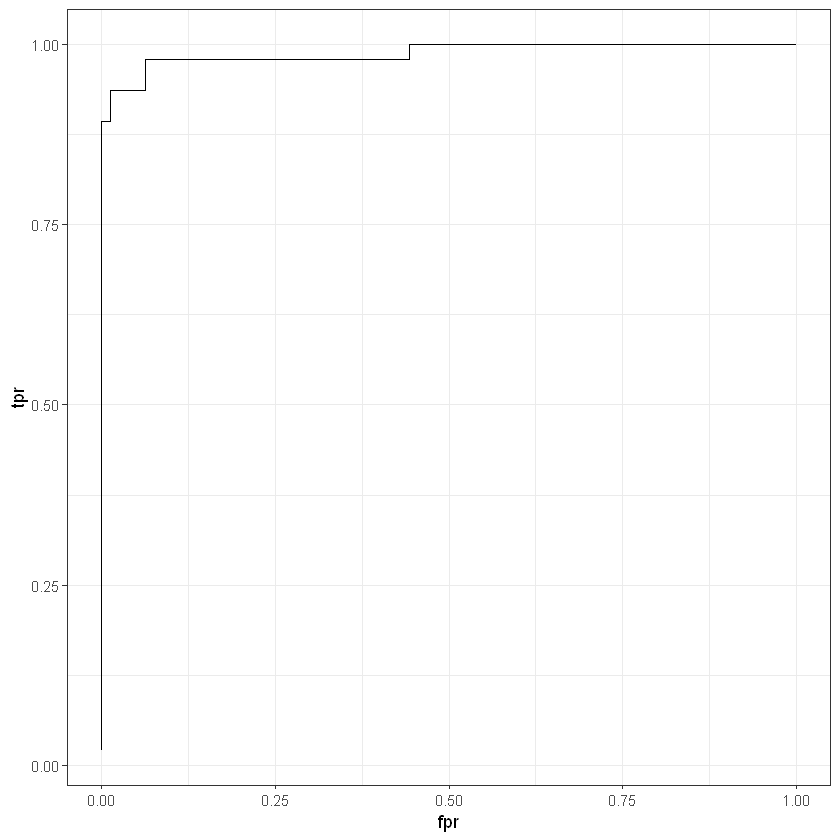

In [30]:
pred_lasso_balanced <- h2o.predict(mydata_lasso_balanced, mydata_test_h2o)
perf_lasso_balanced <- h2o.performance(mydata_lasso_balanced, mydata_test_h2o)

rec <- h2o.recall(perf_lasso_balanced, thresholds = 0.5)
spec <- h2o.specificity(perf_lasso_balanced, thresholds = 0.5)
f1 <- h2o.F1(perf_lasso_balanced, thresholds = 0.5)
auc <- h2o.auc(perf_lasso_balanced)
gini <- h2o.giniCoef(perf_lasso_balanced)
aic <- h2o.aic(mydata_lasso_balanced)

print(paste("Sensivity: ", rec))
print(paste("Specificity: ", spec))
print(paste("F1 Score: ", f1))
print(paste("Area under the curve (AUC): ", auc))
print(paste("Gini Coefficient: ", gini))
print(paste("AIC Coefficient: ", aic))

cm_lasso_balanced <- h2o.confusionMatrix(mydata_lasso_balanced, newdata = mydata_test_h2o, metrics = "f1")
cm_lasso_balanced

fpr <- h2o.fpr(perf_lasso_balanced)[['fpr']]
tpr <- h2o.tpr(perf_lasso_balanced)[['tpr']]
ggplot(data.frame(fpr = fpr, tpr = tpr), aes(fpr, tpr)) + geom_line() + theme_bw()

print(paste("Best Lambda: ", mydata_lasso_balanced@model$lambda_best))

W modelu regresji logistycznej z regularyzacją mamy bardzo mały błąd I-szego i II-giego rodzaju. Czułość modelu jest równa 93%, swoistość - 98%. Metryka F1 jest na poziomie 95%. Pole powierzchni pod krzywą AUC jest równe 98%.

### Drzewo Decyzyjne Random Forest

Sprawdzimy, czy możemy poprawić model jescze bardziej za pomocą modelu Drzew decyzyjnych Random Forest.

Warning message in .verify_dataxy(training_frame, x, y):
"removing response variable from the explanatory variables"


  |======================================================================| 100%


,B,M,Error,Rate
,<dbl>,<dbl>,<dbl>,<chr>
B,74,5,0.06329114,=5/79
M,2,45,0.04255319,=2/47
Totals,76,50,0.05555556,=7/126


[1] "Sensivity:  0.936170212765957"
[1] "Specificity:  0.949367088607595"
[1] "F1 Score:  0.926315789473684"
[1] "Area under the curve (AUC):  0.967411796391058"
[1] "Gini Coefficient:  0.934823592782117"


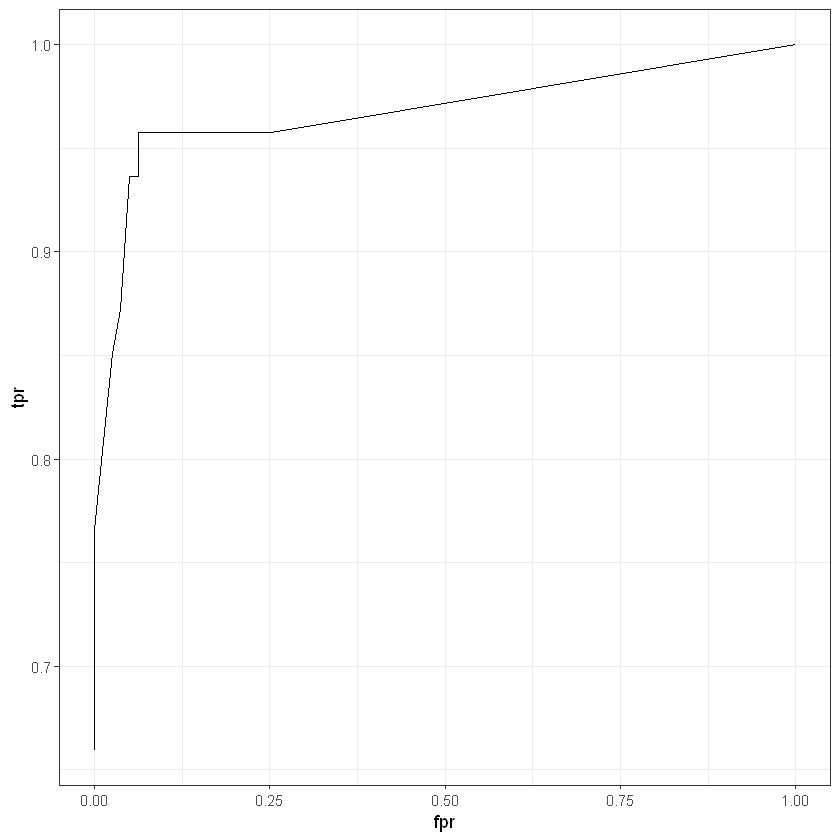

In [31]:
rand_forest_f1 <- h2o.randomForest(
    x = 1:230, # Predyktory
    y = "Diagnosis", # Zmianna objaśniana
    training_frame = "mydata_train", # Zbiór treningowy
    validation_frame = "mydata_test", # Zbiór walidacyjny
    model_id = "rand_forest_f1", # Klucz modelu w H2O
    ntrees = 10, # Ilość dzrzew klasyfikacyjnych
    max_depth = 10, # Maksymalna wielkość drzewa
    mtries = 2, # Liczba losowo wybranych kolumn w splicie
    sample_rate = 0.6320000291, # Prawdopodbieństwo ponownego wylosowania danej obserwacji,
    min_rows = 1, # Minimum obserwacji per liść
    seed = 1234
)

rand_forest_f1_perf <- h2o.performance(rand_forest_f1, newdata = mydata_test_h2o)

h2o.confusionMatrix(rand_forest_f1_perf, metric = "f1")

rec <- h2o.recall(rand_forest_f1_perf, thresholds = 0.5)
spec <- h2o.specificity(rand_forest_f1_perf, thresholds = 0.5)
f1 <- h2o.F1(rand_forest_f1_perf, thresholds = 0.5)
auc <- h2o.auc(rand_forest_f1_perf)
gini <- h2o.giniCoef(rand_forest_f1_perf)

print(paste("Sensivity: ", rec))
print(paste("Specificity: ", spec))
print(paste("F1 Score: ", f1))
print(paste("Area under the curve (AUC): ", auc))
print(paste("Gini Coefficient: ", gini))

fpr <- h2o.fpr(rand_forest_f1_perf)[['fpr']]
tpr <- h2o.tpr(rand_forest_f1_perf)[['tpr']]
ggplot(data.frame(fpr = fpr, tpr = tpr), aes(fpr, tpr)) + geom_line() + theme_bw()

W modelu drzew decyzyjnych mamy bardzo mały błąd I-szego i II-giego rodzaju. Czułość modelu jest równa 93%, swoistość - 94%. Metryka F1 jest na poziomie 92%. Pole powierzchni pod krzywą AUC jest równe 96%.

In [32]:
# Close the cluster

h2o.shutdown(prompt = FALSE)

### Konkluzje

Zróbmy zestawienie statystyk wszystkich 3 modeli:

| Statystyka | Klasyczna Regresja Logit | Regresja Logit z regularyzacją | Drzewo Decyzyjne |
| --- | --- | --- | --- |
| Czułość | 98% | 98% | 93% |
| Swoistość | 89% | 98% | 94% |
| Metryka F1 | 96% | 95% | 92% |
| AUC | 98% | 98% | 96% |

Porównując metrykę F1 i pole powierzchni pod krzywą AUC widzimy, że model Drzewa decyzyjnego ma najsłabsze statystyki w porównaniu z modelami Regresji logistycznej.

Współczynniki AUC dla obu modeli Regresji Logistycznych są takie same. Natomiast metryka F1 dla Klasycznej Regresji Logistycznej jest lepsza o jeden punkt procentowy. Dlatego też model Klasycznej Regresji Logistycznej zostałby wybrany do przewidywania złośliwości zmiany w gruczole sutkowym przy użyciu predyktorów użytych w badanym zbiorze danych.